In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

1. READING THE DATASET


In [215]:
df=pd.read_excel('E:\\progects\\IPEDS_data\\IPEDS_data.xlsx','Data')

In [216]:
df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


2. DATA TREATMENT: CLEANING AND FORMATTING


In [217]:
df.shape

(1534, 145)

In [218]:
df.info(max_cols=len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

*working with missing data

In [219]:
df.isna().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [220]:
perc_nan=df.isna().sum()/len(df)*100
perc_nan

ID number                                                 0.000000
Name                                                      0.000000
year                                                      0.000000
ZIP code                                                  0.000000
Highest degree offered                                    0.000000
                                                           ...    
Percent of freshmen receiving student loan aid            2.737940
Percent of freshmen receiving federal student loans       2.737940
Percent of freshmen receiving other loan aid              2.737940
Endowment assets (year end) per FTE enrollment (GASB)    66.362451
Endowment assets (year end) per FTE enrollment (FASB)    37.418514
Length: 145, dtype: float64

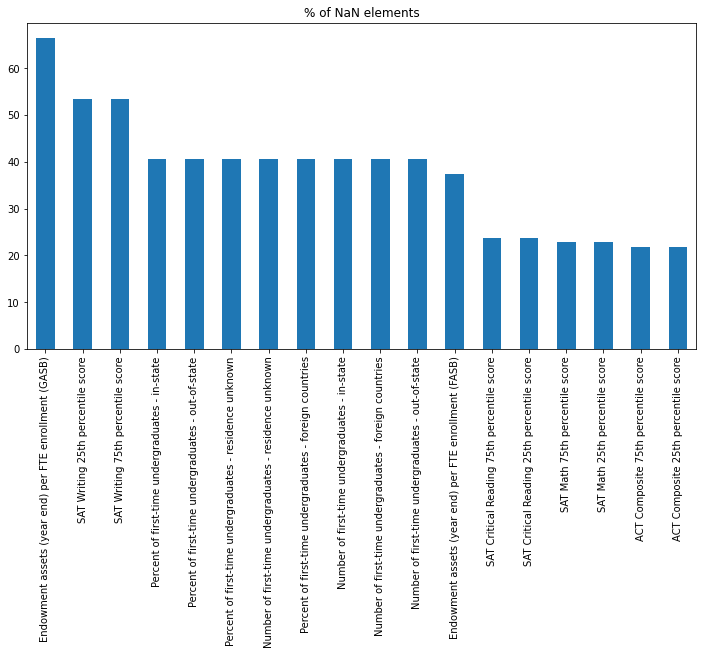

In [221]:
X=perc_nan[perc_nan>=20].sort_values(ascending=False).plot.bar(title='percentage of NON values',figsize=(12,6))
plt.title('% of NaN elements');

In [222]:
z=perc_nan[perc_nan>=20].index
z

Index(['SAT Critical Reading 25th percentile score',
       'SAT Critical Reading 75th percentile score',
       'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
       'SAT Writing 25th percentile score',
       'SAT Writing 75th percentile score',
       'ACT Composite 25th percentile score',
       'ACT Composite 75th percentile score',
       'Number of first-time undergraduates - in-state',
       'Percent of first-time undergraduates - in-state',
       'Number of first-time undergraduates - out-of-state',
       'Percent of first-time undergraduates - out-of-state',
       'Number of first-time undergraduates - foreign countries',
       'Percent of first-time undergraduates - foreign countries',
       'Number of first-time undergraduates - residence unknown',
       'Percent of first-time undergraduates - residence unknown',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      

In [223]:
df.drop(z,axis=1,inplace=True)

In [224]:
df.shape

(1534, 127)

*Invalid values


In [225]:
col=df.select_dtypes(include=['float64','int64']).columns

In [226]:
xx=list()
for i in col:
    for x in df[i] :
        if(x < 0):
            print(x)    

-86.568502
-86.80917
-86.17401
-86.63842
-86.295677
-87.545766
-86.96514
-86.177351
-85.492409
-86.853636
-87.023531
-86.21641
-86.285313
-85.766644
-87.316127
-88.186077
-86.908605
-88.128934
-86.865099
-87.680999
-86.661628
-86.790932
-88.18189
-88.138199
-87.585242
-86.113675
-85.950191
-85.710315
-149.826135
-147.824751
-134.636346
-149.804242
-112.092247
-111.940011
-110.950769
-112.452285
-111.657653
-112.113447
-112.476509
-112.026211
-92.341835
-92.290555
-91.628115
-94.178214
-92.021263
-90.680478
-93.13233
-91.812971
-92.45931
-92.444102
-91.729008
-93.060313
-92.442021
-94.559088
-93.052442
-93.467924
-92.28242
-90.939876
-93.235087
-94.374073
-117.88795
-118.017342
-122.416537
-117.42587
-118.12574
-118.879467
-120.65856
-117.094398
-119.104711
-120.852511
-117.322508
-117.819019
-121.846333
-118.259316
-119.748258
-117.885349
-122.058073
-118.1123
-118.168965
-118.526817
-121.42194
-122.260401
-121.751958
-117.841248
-118.443901
-117.331098
-117.237793
-119.848031
-122.067

NOTE :this negative values are associated for Longitude location of institution and its normal that there negative values in this column.

*Inconsistent values

In [227]:
total_zero=(df[df.loc[0:]==0]).count().sum()
total_zero

29254

In [228]:
df.describe

<bound method NDFrame.describe of       ID number                                           Name  year  \
0        100654                       Alabama A & M University  2013   
1        100663            University of Alabama at Birmingham  2013   
2        100690                             Amridge University  2013   
3        100706            University of Alabama in Huntsville  2013   
4        100724                       Alabama State University  2013   
...         ...                                            ...   ...   
1529     451671   University of South Florida-Sarasota-Manatee  2013   
1530     454184                           The Kingâ€™s College  2013   
1531     454582                       Ottawa University-Online  2013   
1532     455770                   Providence Christian College  2013   
1533     456490  Polytechnic University of Puerto Rico-Orlando  2013   

        ZIP code                             Highest degree offered  \
0          35762             D

In [229]:
def remove_space(list_headers,charact): #charact should be: charact=[' - ',' ']
    new_headers=list()
    for header in list_headers:
        for char in charact:      
            if char in header:
                header=header.replace(char,'_')
            header=header
        new_headers.append(header)
    return new_headers

In [230]:
def remove_sp_char(headers,chars):
    new_headers=list()
    for header in headers:    
        for char in chars:
            if char=='-' or char=='/':
                header=header.replace(char,'_')
            if char in header:
                header=header.replace(char,'')
            
            header=header   
        new_headers.append(header)
    return new_headers    

In [231]:
headers=remove_space(df.columns,[' - ',' '])

In [232]:
headers=remove_sp_char(headers,["'",',',':','-','/'])

In [233]:
list_new_header=list()

for header in headers:
    header=header.casefold()   # All capitalized letters are changed.
    
    if "degrese" in header:    # One column name has a typo.  
        header=header.replace("degrese",'degrees')
            
    list_new_header.append(header)

In [234]:
df.columns=list_new_header

In [276]:
df.columns

Index(['id_number', 'name', 'year', 'zip_code', 'highest_degree_offered',
       'county_name', 'longitude_location_of_institution',
       'latitude_location_of_institution', 'religious_affiliation',
       'offers_less_than_one_year_certificate',
       ...
       'percent_of_freshmen__receiving_federal_grant_aid',
       'percent_of_freshmen_receiving_pell_grants',
       'percent_of_freshmen_receiving_other_federal_grant_aid',
       'percent_of_freshmen_receiving_state_local_grant_aid',
       'percent_of_freshmen_receiving_institutional_grant_aid',
       'percent_of_freshmen_receiving_student_loan_aid',
       'percent_of_freshmen_receiving_federal_student_loans',
       'percent_of_freshmen_receiving_other_loan_aid', 'acceptance_rate',
       'enrollment_rate'],
      dtype='object', length=129)

3.Exploratory Data Analysis (EDA) and Visualization

In [ ]:
df1=df[['Name','Applicants total']].sort_values('Applicants total',ascending=False).head(30)

In [258]:
df1

,Name,Applicants total
84,University of California-Los Angeles,72676.0
81,University of California-Berkeley,61717.0
86,University of California-San Diego,60832.0
841,New York University,57845.0
83,University of California-Irvine,56515.0
87,University of California-Santa Barbara,55258.0
77,California State University-Long Beach,55019.0
863,St John's University-New York,51634.0
126,San Diego State University,51163.0
82,University of California-Davis,49820.0


Text(0, 0.5, 'name of university')

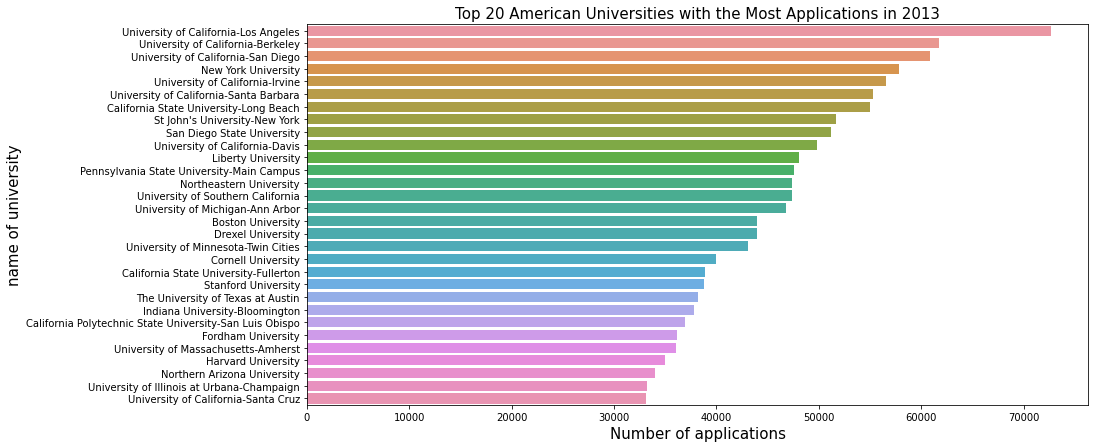

In [259]:
plt.figure(figsize=(14,7))
sns.barplot(x='Applicants total',y='Name',data=df1)
plt.title('Top 20 American Universities with the Most Applications in 2013',fontsize=15)
plt.xlabel('Number of applications',fontsize=15)
plt.ylabel('name of university',fontsize=15)

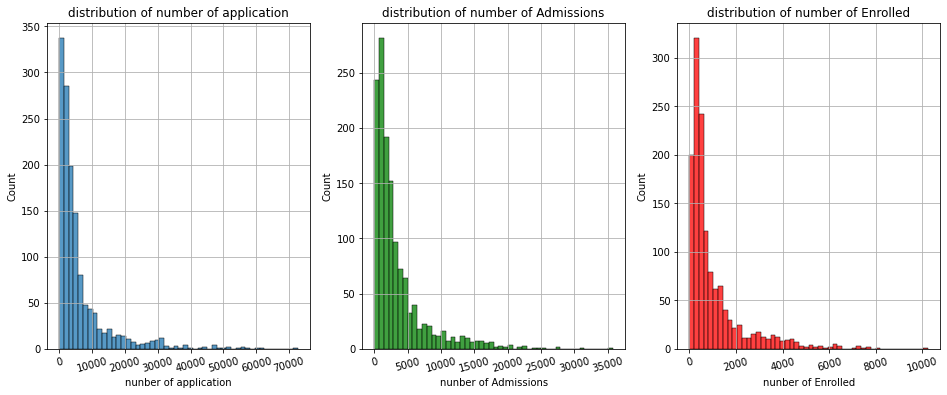

In [260]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(df.applicants_total,bins=50)
plt.title('distribution of number of application')
plt.xlabel('nunber of application')
plt.xticks(rotation=15)
plt.grid()

plt.subplot(1,3,2)
sns.histplot(df.admissions_total,bins=50,color='g')
plt.title('distribution of number of Admissions')
plt.xlabel('nunber of Admissions')
plt.xticks(rotation=15)
plt.grid()

plt.subplot(1,3,3)
sns.histplot(df.enrolled_total,bins=50,color='r')
plt.title('distribution of number of Enrolled')
plt.xlabel('nunber of Enrolled')
plt.xticks(rotation=15)
plt.grid()



Do universities with a high number of applications are the preferred ones by students?; in other words, could the number of applications tell us that a university is one of the most preferred by students?

Do students prefer universities that have a high rate of admission?, in other words, do students prefer a university where it is easier for them to be admitted?

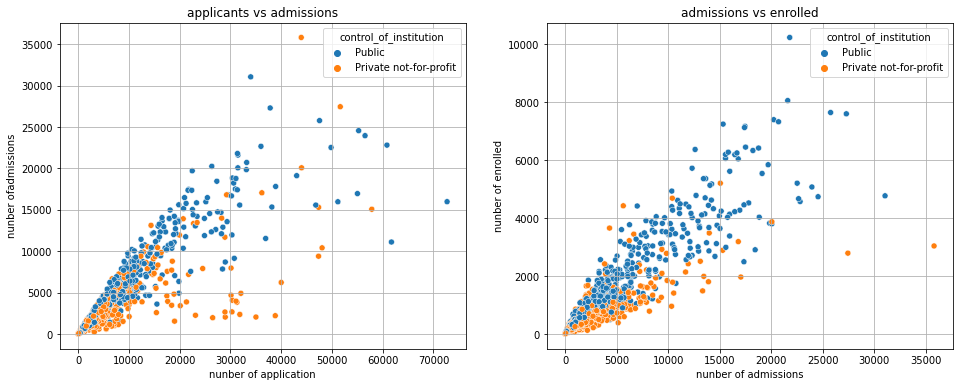

In [261]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(x='applicants_total',y='admissions_total',data=df,hue=df.control_of_institution)
plt.title('applicants vs admissions')
plt.xlabel('nunber of application')
plt.ylabel('nunber ofadmissions')
plt.grid()


plt.subplot(1,2,2)
sns.scatterplot(x='admissions_total',y='enrolled_total',data=df,hue=df.control_of_institution)
plt.title('admissions vs enrolled')
plt.xlabel('nunber of admissions')
plt.ylabel('nunber of enrolled')
plt.grid()


In [262]:
df['acceptance_rate']=(df.admissions_total/df.applicants_total*100).round(2)

In [263]:
df['enrollment_rate']=(df.enrolled_total/df.admissions_total*100).round(2)


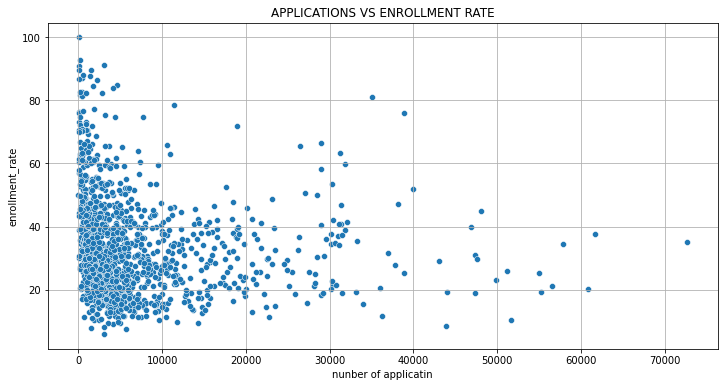

In [264]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='applicants_total',y='enrollment_rate',data=df)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.xlabel('nunber of applicatin')
plt.grid()

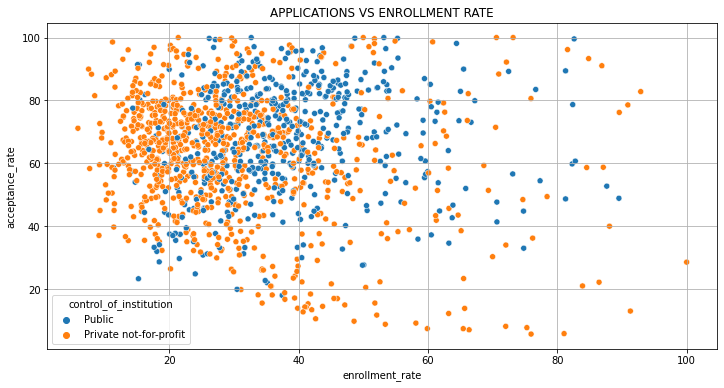

In [265]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='enrollment_rate',y='acceptance_rate',data=df,hue=df.control_of_institution)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.xlabel('enrollment_rate')
plt.grid()

In [266]:
high_acceptance=df[df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).head(25)

In [267]:
low_acceptance=df[df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).tail(25)

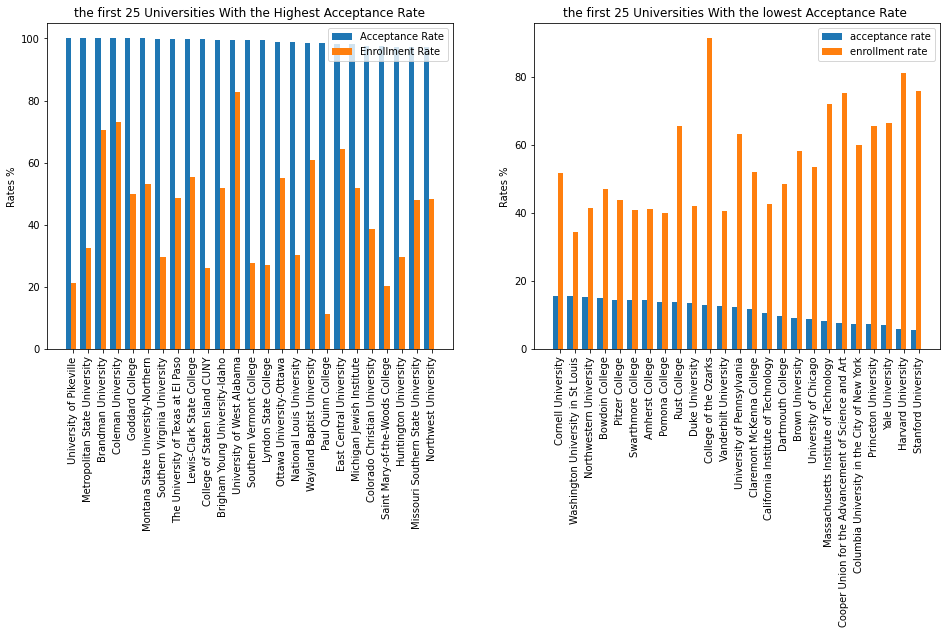

In [268]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ind = np.arange(len(high_acceptance)) #number of universities
width = 0.35  #space

plt.bar(ind,high_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind +width, high_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('the first 25 Universities With the Highest Acceptance Rate')
plt.xticks(ind + width,high_acceptance.name,rotation=90 )## ind + width= 0,1,...+0.35
plt.ylabel('Rates %')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.bar(ind,low_acceptance.acceptance_rate,width,label='acceptance rate')
plt.bar(ind + width ,low_acceptance.enrollment_rate,width,label='enrollment rate')
plt.title('the first 25 Universities With the lowest Acceptance Rate ')
plt.xticks(ind+ width,low_acceptance.name,rotation=90 )
plt.ylabel('Rates %')
plt.legend(loc='best')

Do students prefer public or private universities?

In [308]:
private_uni=df[df.control_of_institution=='Private not-for-profit']
private_uni=private_uni[private_uni.applicants_total.notnull()]

public_uni=df[df.control_of_institution=='Public']
public_uni=public_uni[public_uni.applicants_total.notnull()]

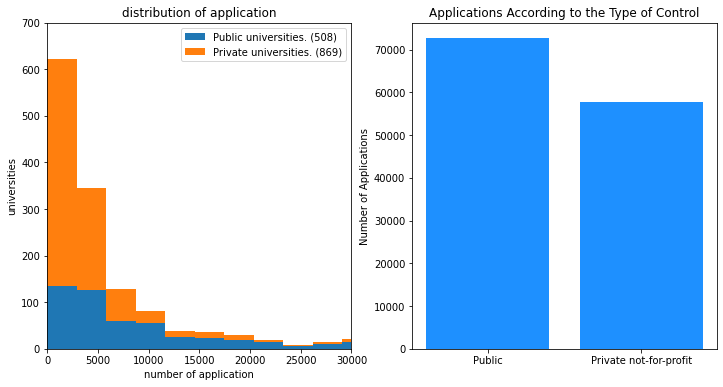

In [378]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist([public_uni.applicants_total,private_uni.applicants_total],stacked=True,bins=25)
plt.axis([0,30000,0,700])
plt.title('distribution of application')
plt.ylabel('universities')
plt.xlabel('number of application')
plt.legend(['Public universities. ({})'.format(len(public_uni)),'Private universities. ({})'.format(len(private_uni))])

plt.subplot(1,2,2)
plt.bar(df.control_of_institution,df.applicants_total,color=['dodgerblue'])
plt.title('Applications According to the Type of Control')
plt.ylabel('Number of Applications');

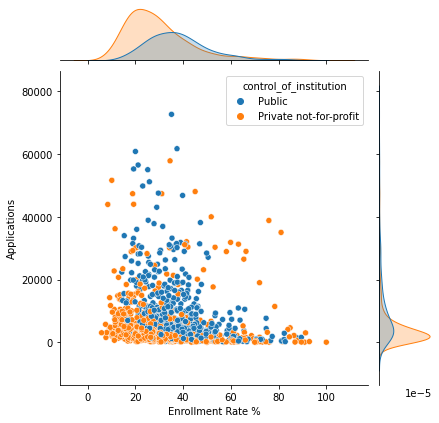

In [342]:
g=sns.jointplot(x=df.enrollment_rate,y=df.applicants_total,hue=df.control_of_institution)
g=(g.set_axis_labels("Enrollment Rate %","Applications"));

 Do students prefer universities with low tuition and fees?

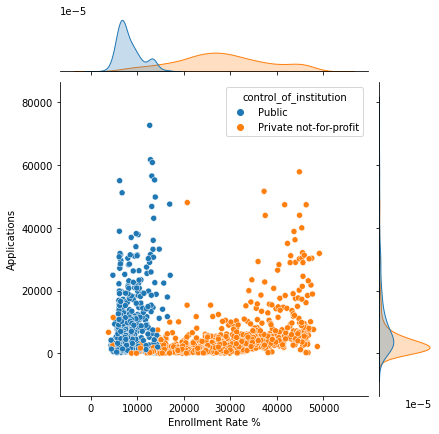

In [341]:
k=sns.jointplot(x=df.tuition_and_fees_2013_14,y=df.applicants_total,hue=df.control_of_institution)
k=(k.set_axis_labels("Enrollment Rate %","Applications"))

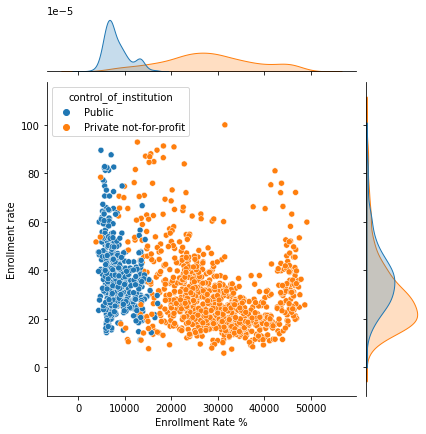

In [343]:
z=sns.jointplot(x=df.tuition_and_fees_2013_14,y=df.enrollment_rate,hue=df.control_of_institution)
z=(z.set_axis_labels('Enrollment Rate %','Enrollment rate'))

Do students prefer a university for its low cost of on-campus living?

Text(0, 0.5, 'enrollment rate')

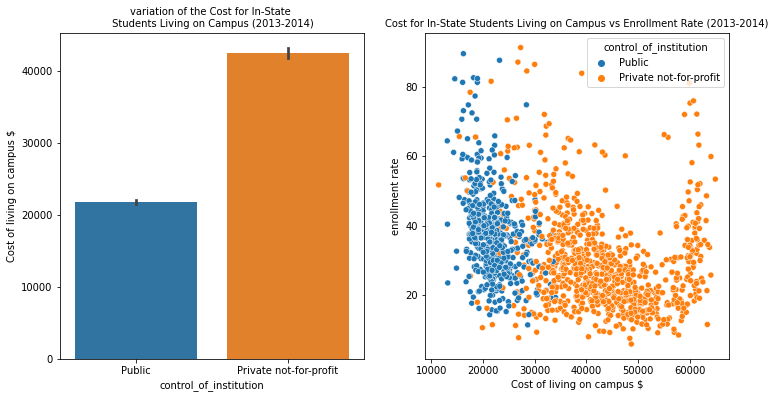

In [352]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x=df.control_of_institution,y=df.total_price_for_in_state_students_living_on_campus_2013_14)
plt.title('variation of the Cost for In-State \n Students Living on Campus (2013-2014)',fontsize=10)
plt.ylabel('Cost of living on campus $')


plt.subplot(1,2,2)
sns.scatterplot(x=df.total_price_for_in_state_students_living_on_campus_2013_14,
                y=df.enrollment_rate,
                hue=df.control_of_institution)
plt.title('Cost for In-State Students Living on Campus vs Enrollment Rate (2013-2014)',fontsize=10)
plt.xlabel('Cost of living on campus $')
plt.ylabel('enrollment rate')

Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?

In [353]:
hg_degree=df.highest_degree_offered.value_counts()
hg_degree

Master's degree                                                     587
Doctor's degree - research/scholarship and professional practice    311
Bachelor's degree                                                   282
Doctor's degree - research/scholarship                              201
Doctor's degree -  professional practice                            125
Doctor's degree - other                                              28
Name: highest_degree_offered, dtype: int64

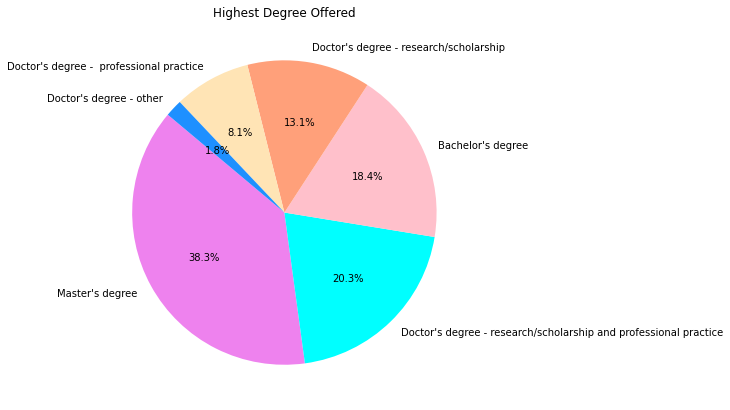

In [374]:
plt.figure(figsize=(17,7))
plt.pie(hg_degree,labels=hg_degree.index,
        autopct='%.1f%%',startangle=140,
        colors=['violet','aqua','pink','lightsalmon','moccasin','dodgerblue'])
plt.title('Highest Degree Offered');

Text(0.5, 1.0, 'Highest Degree Offered vs Enrollment Rate')

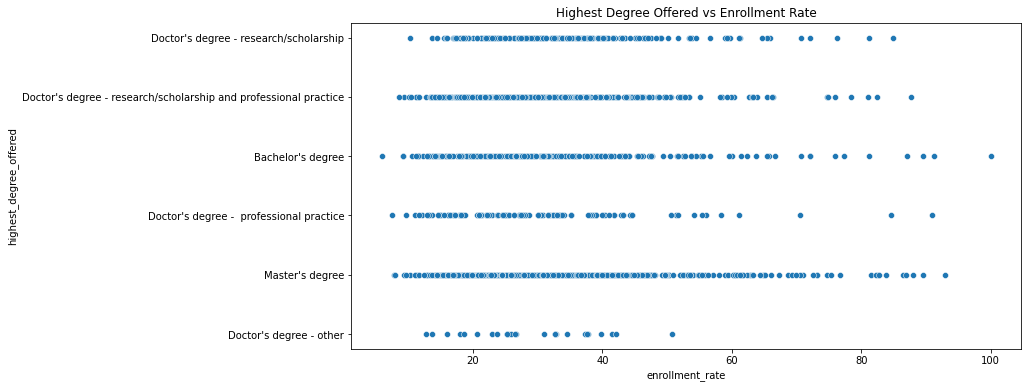

In [382]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df.enrollment_rate,y=df.highest_degree_offered)
plt.title('Highest Degree Offered vs Enrollment Rate')